In [7]:
%load_ext autoreload

%autoreload 2

import gpytorch
from models_util import load_combined_model, test_model, test_model_with_rejection, test_cnn_model, test_cnn_model_with_rejection, compare_rejection_models
from data_util import get_data_loader#, read_data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pylab
from conv_net import ConvNet
import torch
from torchvision import datasets, transforms

In [159]:
pretrained_model = "models/cnn_mnist.ckpt"
cnn_model = ConvNet()
cnn_model.load_state_dict(torch.load(pretrained_model, map_location='cpu'))
cnn_model.eval()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25)
  )
  (layer3): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
  )
  (fc): Sequential(
    (0): ReLU()
    (1): Dropout(p=0.5)
    (2): Linear(in_features=128, out_features=10, bias=True)
    (3): Softmax()
  )
)

## GP Model

In [160]:
model, likelihood = load_combined_model('models/gp_mnist.dat')

## Mnist Data

### Standard

In [161]:
normalize = transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761])
common_trans = [transforms.ToTensor(), normalize]
test_compose = transforms.Compose(common_trans)

test_set = datasets.MNIST('data', train=False, transform=test_compose)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False,
                                          sampler=torch.utils.data.SubsetRandomSampler(list(
                                              range(10000))))

with gpytorch.settings.use_toeplitz(False), gpytorch.settings.max_preconditioner_size(0):
    correct_mnist_var, wrong_mnist_var = test_model(model, likelihood, test_loader)

GP test set: Accuracy: 8780/10000 (87%)


In [162]:
print("Correct average variance is {}".format(correct_mnist_var.mean()))
print("Wrong average variance   is {}".format(wrong_mnist_var.mean()))

Correct average variance is 0.05007278546690941
Wrong average variance   is 0.08989573270082474


In [163]:
correct_cnn_mnist_var, wrong_cnn_mnist_var = test_cnn_model(cnn_model, test_loader)

CNN test set: Accuracy: 9869/10000 (98.69%)


In [164]:
print("Correct CNN average variance is {}".format(correct_cnn_awgn_var.mean()))
print("Wrong CNN average variance is   {}".format(wrong_cnn_awgn_var.mean()))

Correct CNN average variance is 0.010397480179866156
Wrong CNN average variance is   0.16958510875701904


## AWGN Data

In [165]:
test_loader = get_data_loader('data/mnist-with-awgn.mat', num_samples=10000)

### Standard

In [166]:
with gpytorch.settings.use_toeplitz(False), gpytorch.settings.max_preconditioner_size(0):
    correct_awgn_var, wrong_awgn_var = test_model(model, likelihood, test_loader)

GP test set: Accuracy: 9576/10000 (95%)


In [167]:
print("Correct average variance is {}".format(correct_awgn_var.mean()))
print("Wrong average variance is   {}".format(wrong_awgn_var.mean()))

Correct average variance is 0.00976182334125042
Wrong average variance is   0.062234051525592804


In [168]:
correct_cnn_awgn_var, wrong_cnn_awgn_var = test_cnn_model(cnn_model, test_loader)

CNN test set: Accuracy: 9646/10000 (96.46%)


In [169]:
print("Correct CNN average variance is {}".format(correct_cnn_awgn_var.mean()))
print("Wrong CNN average variance is   {}".format(wrong_cnn_awgn_var.mean()))

Correct CNN average variance is 0.00810734370598624
Wrong CNN average variance is   0.17055117444129986


### With Rejection

In [120]:
awgn_cnn_scores, awgn_cnn_rej_scores, awgn_gp_scores = compare_rejection_models(test_loader, cnn_model, model, likelihood, gp_threshold=0.065, cnn_threshold=0.17)


Penalty: 0
GP with rejection: score: 6920
CNN test set: Accuracy: 9646/10000 (96.46%)
CNN with rejection: score: 9312


Penalty: 2
GP with rejection: score: 7024
CNN test set: Accuracy: 8938/10000 (89.38%)
CNN with rejection: score: 9044


Penalty: 4
GP with rejection: score: 7005
CNN test set: Accuracy: 8230/10000 (82.3%)
CNN with rejection: score: 8776


Penalty: 6
GP with rejection: score: 6833
CNN test set: Accuracy: 7522/10000 (75.22%)
CNN with rejection: score: 8508


Penalty: 8
GP with rejection: score: 6769
CNN test set: Accuracy: 6814/10000 (68.14%)
CNN with rejection: score: 8240


Penalty: 10
GP with rejection: score: 6798
CNN test set: Accuracy: 6106/10000 (61.06%)
CNN with rejection: score: 7972




In [3]:
awgn_gp_scores = [6920, 7024, 7005, 6833, 6769, 6798]
awgn_cnn_scores = [9649, 8938, 8230, 7522, 6814, 6106]
awgn_cnn_rej_scores = [9312, 9044, 8776, 8508, 8240, 7972]

## Motion Blur  Data

In [170]:
test_loader = get_data_loader('data/mnist-with-motion-blur.mat', num_samples=10000)

### Standard

In [171]:
with gpytorch.settings.use_toeplitz(False), gpytorch.settings.max_preconditioner_size(0):
    correct_mb_var, wrong_mb_var = test_model(model, likelihood, test_loader)

GP test set: Accuracy: 6849/10000 (68%)


In [172]:
print("Correct average variance is {}".format(correct_mb_var.mean()))
print("Wrong average variance is   {}".format(wrong_mb_var.mean()))

Correct average variance is 0.03003999963402748
Wrong average variance is   0.05582951381802559


In [173]:
correct_cnn_mb_var, wrong_cnn_mb_var = test_cnn_model(cnn_model, test_loader)

CNN test set: Accuracy: 7042/10000 (70.42%)


In [174]:
print("Correct CNN average variance is {}".format(correct_cnn_mb_var.mean()))
print("Wrong CNN average variance is {}".format(wrong_cnn_mb_var.mean()))

Correct CNN average variance is 0.03668631570510517
Wrong CNN average variance is 0.14301782756781883


### With Rejection

In [122]:
mb_cnn_scores, mb_cnn_rej_scores, mb_gp_scores = compare_rejection_models(test_loader, cnn_model, model, likelihood, gp_threshold=0.058, cnn_threshold=0.143)

Penalty: 0
GP with rejection: score: 2867
CNN test set: Accuracy: 7042/10000 (70.42%)
CNN with rejection: score: 5984


Penalty: 2
GP with rejection: score: 2285
CNN test set: Accuracy: 1126/10000 (11.26%)
CNN with rejection: score: 3208


Penalty: 4
GP with rejection: score: 1575
CNN test set: Accuracy: -4790/10000 (-47.9%)
CNN with rejection: score: 432


Penalty: 6
GP with rejection: score: 980
CNN test set: Accuracy: -10706/10000 (-107.06%)
CNN with rejection: score: -2344


Penalty: 8
GP with rejection: score: 214
CNN test set: Accuracy: -16622/10000 (-166.22%)
CNN with rejection: score: -5120


Penalty: 10
GP with rejection: score: -313
CNN test set: Accuracy: -22538/10000 (-225.38%)
CNN with rejection: score: -7896




In [4]:
mb_gp_scores = [2867, 2285, 1575, 980, 214, -313]
mb_cnn_scores = [7042, 1126, -4790, -10706, -16622, -22538]
mb_cnn_rej_scores = [5984, 3208, 432, -2344, -5120, -7896]

## Reduced Contrast + AWGN Data

In [175]:
test_loader = get_data_loader('data/mnist-with-reduced-contrast-and-awgn.mat', num_samples=10000)

### Standard

In [176]:
with gpytorch.settings.use_toeplitz(False), gpytorch.settings.max_preconditioner_size(0):
    correct_rc_awgn_var, wrong_rc_awgn_var = test_model(model, likelihood, test_loader)

GP test set: Accuracy: 6049/10000 (60%)


In [177]:
print("Correct average variance is {}".format(correct_rc_awgn_var.mean()))
print("Wrong average variance is {}".format(wrong_rc_awgn_var.mean()))

Correct average variance is 0.033127740025520325
Wrong average variance is 0.06404520571231842


In [178]:
correct_cnn_rc_awgn_var, wrong_cnn_rc_awgn_var = test_cnn_model(cnn_model, test_loader)

CNN test set: Accuracy: 5856/10000 (58.56%)


In [179]:
print("Correct CNN average variance is {}".format(correct_cnn_rc_awgn_var.mean()))
print("Wrong CNN average variance is {}".format(wrong_cnn_rc_awgn_var.mean()))

Correct CNN average variance is 0.0917822260236561
Wrong CNN average variance is 0.2538451557497145


### With Rejection

In [124]:
rc_awgn_cnn_scores, rc_awgn_cnn_rej_scores, rc_awgn_gp_scores = compare_rejection_models(test_loader, cnn_model, model, likelihood, gp_threshold=0.143, cnn_threshold=0.253)

Penalty: 0
GP with rejection: score: 3002
CNN test set: Accuracy: 5856/10000 (58.56%)
CNN with rejection: score: 3767


Penalty: 2
GP with rejection: score: 2017
CNN test set: Accuracy: -2432/10000 (-24.32%)
CNN with rejection: score: 2103


Penalty: 4
GP with rejection: score: 858
CNN test set: Accuracy: -10720/10000 (-107.2%)
CNN with rejection: score: 439


Penalty: 6
GP with rejection: score: -267
CNN test set: Accuracy: -19008/10000 (-190.08%)
CNN with rejection: score: -1225


Penalty: 8
GP with rejection: score: -1145
CNN test set: Accuracy: -27296/10000 (-272.96%)
CNN with rejection: score: -2889


Penalty: 10
GP with rejection: score: -2354
CNN test set: Accuracy: -35584/10000 (-355.84%)
CNN with rejection: score: -4553




In [5]:
rc_awgn_gp_scores = [3002, 2017, 858, -267, --145, -2354]
rc_awgn_cnn_scores = [5856, -2432, -10720, -19008, -27296, -35584]
rc_awgn_cnn_rej_scores = [3767, 2103, 439, -1225, -2889, -4553]

# Plots

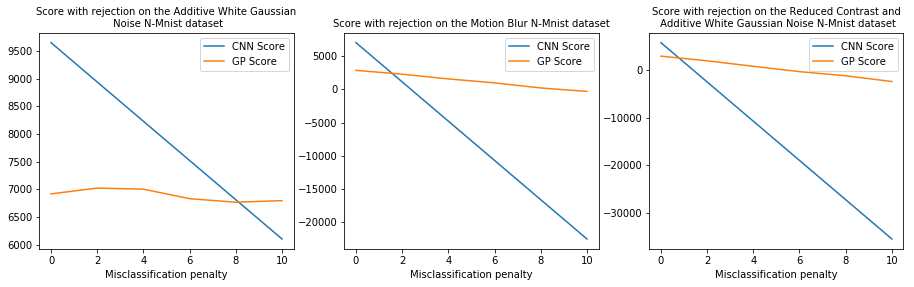

In [139]:
cnn_scores = [awgn_cnn_scores, mb_cnn_scores, rc_awgn_cnn_scores]
gp_scores = [awgn_gp_scores, mb_gp_scores, rc_awgn_gp_scores]
x = [0, 2, 4, 6, 8, 10]
datasets = ['Additive White Gaussian\n Noise N-Mnist', 'Motion Blur N-Mnist', 'Reduced Contrast and\n Additive White Gaussian Noise N-Mnist']
labels = ['awgn', 'mb', 'rc+awgn']

with matplotlib.rc_context({'figure.figsize': [15, 3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, _ in enumerate(cnn_scores):
        ax = fig.add_subplot(1, 3, i+1)  # 2 rows of panels, 3 columns
        ax.plot(x, cnn_scores[i], label='CNN Score')
        ax.plot(x, gp_scores[i], label='GP Score')
        ax.legend()
#         ax.set_ylabel('Log Perplexity')
        ax.set_xlabel('Misclassification penalty')
        ax.set_title('Score with rejection on the {} dataset'.format(datasets[i]))
    fig.subplots_adjust(left=0.1, right=0.9, top=1.1, bottom=0.1)
    pylab.savefig('plots/rejection_scores.pdf', bbox_inches='tight')

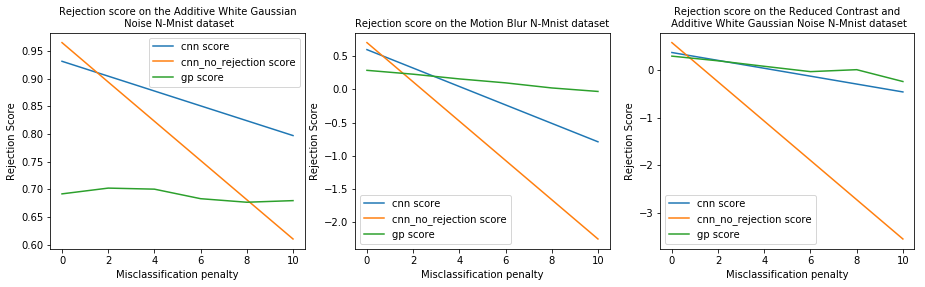

In [11]:
cnn_scores = np.array([awgn_cnn_scores, mb_cnn_scores, rc_awgn_cnn_scores]) / 10000
cnn_rej_scores = np.array([awgn_cnn_rej_scores, mb_cnn_rej_scores, rc_awgn_cnn_rej_scores]) / 10000
gp_scores = np.array([awgn_gp_scores, mb_gp_scores, rc_awgn_gp_scores]) / 10000
x = [0, 2, 4, 6, 8, 10]
datasets = ['Additive White Gaussian\n Noise N-Mnist', 'Motion Blur N-Mnist', 'Reduced Contrast and\n Additive White Gaussian Noise N-Mnist']
labels = ['awgn', 'mb', 'rc+awgn']

with matplotlib.rc_context({'figure.figsize': [15, 3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, _ in enumerate(cnn_scores):
        ax = fig.add_subplot(1, 3, i+1)  # 2 rows of panels, 3 columns
        ax.plot(x, cnn_rej_scores[i], label='cnn score')
        ax.plot(x, cnn_scores[i], label='cnn_no_rejection score')
        ax.plot(x, gp_scores[i], label='gp score')
        ax.legend()
#         ax.set_ylabel('Log Perplexity')
        ax.set_xlabel('Misclassification penalty')
        ax.set_ylabel('Rejection Score')
        ax.set_title('Rejection score on the {} dataset'.format(datasets[i]))
    fig.subplots_adjust(left=0.1, right=0.9, top=1.1, bottom=0.1)
    pylab.savefig('plots/rejection_scores.pdf', bbox_inches='tight')

## Variance

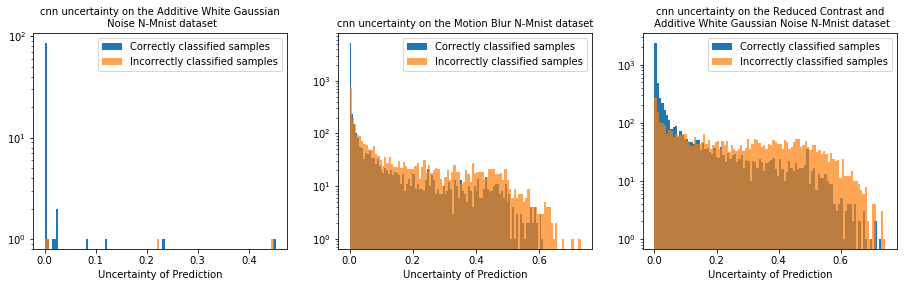

In [150]:
correct_variances = [correct_cnn_awgn_var, correct_cnn_mb_var, correct_cnn_rc_awgn_var]
wrong_variances = [wrong_cnn_awgn_var, wrong_cnn_mb_var, wrong_cnn_rc_awgn_var]
datasets = ['Additive White Gaussian\n Noise N-Mnist', 'Motion Blur N-Mnist', 'Reduced Contrast and\n Additive White Gaussian Noise N-Mnist']
labels = ['awgn', 'mb', 'rc+awgn']

with matplotlib.rc_context({'figure.figsize': [15, 3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, var in enumerate(correct_variances):
        ax = fig.add_subplot(1, 3, i+1)  # 2 rows of panels, 3 columns
        ax.hist(correct_variances[i], label='Correctly classified samples'.format(labels[i]), bins=100, alpha=1)
        ax.hist(wrong_variances[i], label='Incorrectly classified samples'.format(labels[i]), bins=100, alpha=0.7)
        ax.legend()
#         ax.set_ylabel('Log Perplexity')
        ax.set_xlabel('Uncertainty of Prediction')
        ax.set_title('cnn uncertainty on the {} dataset'.format(datasets[i]))
        ax.set_yscale('log')
    fig.subplots_adjust(left=0.1, right=0.9, top=1.1, bottom=0.1)
    pylab.savefig('plots/cnn_pred_var.pdf', bbox_inches='tight')

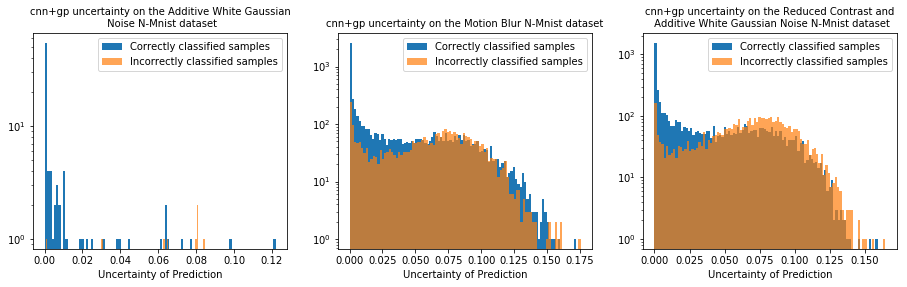

In [152]:
correct_variances = [correct_awgn_var, correct_mb_var, correct_rc_awgn_var]
wrong_variances = [wrong_awgn_var, wrong_mb_var, wrong_rc_awgn_var]
datasets = ['Additive White Gaussian\n Noise N-Mnist', 'Motion Blur N-Mnist', 'Reduced Contrast and\n Additive White Gaussian Noise N-Mnist']
labels = ['awgn', 'mb', 'rc+awgn']

with matplotlib.rc_context({'figure.figsize': [15, 3], 'axes.titlesize': 10}):
    fig = plt.figure()
    for i, var in enumerate(correct_variances):
        ax = fig.add_subplot(1, 3, i+1)  # 2 rows of panels, 3 columns
        ax.hist(correct_variances[i], label='Correctly classified samples'.format(labels[i]), bins=100, alpha=1)
        ax.hist(wrong_variances[i], label='Incorrectly classified samples'.format(labels[i]), bins=100, alpha=0.7)
        ax.legend()
#         ax.set_ylabel('Log Perplexity')
        ax.set_xlabel('Uncertainty of Prediction')
        ax.set_title('cnn+gp uncertainty on the {} dataset'.format(datasets[i]))
        ax.set_yscale('log')
    fig.subplots_adjust(left=0.1, right=0.9, top=1.1, bottom=0.1)
    pylab.savefig('plots/gp_pred_var.pdf', bbox_inches='tight')

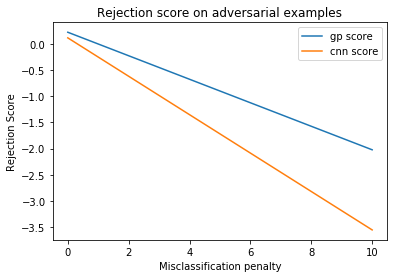

In [15]:
gp_adv_scores = np.array([218, -230, -678, -1126, -1574, -2022]) / 1000
cnn_adv_scores = np.array([111, -621, -1353, -2085, -2817, -3549]) / 1000

x = [0, 2, 4, 6, 8, 10]

plt.plot(x, gp_adv_scores, label='gp score')
plt.plot(x, cnn_adv_scores, label='cnn score')

plt.legend()
#         ax.set_ylabel('Log Perplexity')
plt.xlabel('Misclassification penalty')
plt.ylabel('Rejection Score')
plt.title('Rejection score on adversarial examples'.format(datasets[i]))

pylab.savefig('plots/rejection_scores_adv.pdf', bbox_inches='tight')    